# Logistic Regression

## Predicting if a person would buy life insurnace based on his age using logistic regression

Above is a binary logistic regression problem as there are only two possible outcomes (i.e. if person buys insurance or he/she doesn't). 

In [20]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [21]:
df = pd.read_csv("Data/insurance_data.csv")
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


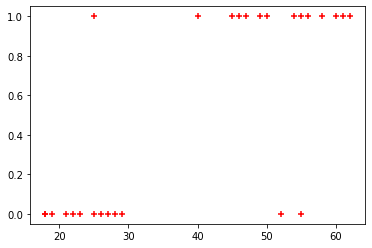

In [22]:
plt.scatter(df.age,df.bought_insurance,marker='+',color='red')

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(df[['age']],df.bought_insurance,train_size=0.8)

In [25]:
X_test

,age
17,58
0,22
8,62
3,52
26,23
14,49


In [26]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [27]:
model.fit(X_train, y_train)

LogisticRegression()

In [28]:
X_test

,age
17,58
0,22
8,62
3,52
26,23
14,49


In [29]:
y_predicted = model.predict(X_test)

In [30]:
model.predict_proba(X_test)

array([[0.04050312, 0.95949688],
       [0.89739141, 0.10260859],
       [0.0228062 , 0.9771938 ],
       [0.09312207, 0.90687793],
       [0.88292391, 0.11707609],
       [0.13804421, 0.86195579]])

In [31]:
model.score(X_test,y_test)

0.8333333333333334

In [32]:
y_predicted

array([1, 0, 1, 1, 0, 1])

In [33]:
X_test

,age
17,58
0,22
8,62
3,52
26,23
14,49


model.coef_ indicates value of $m$ in $y=m*x + b$ equation

In [34]:
model.coef_

array([[0.14815557]])

model.intercept_ indicates value of $b$ in $y=m*x + b$ equation

In [35]:
model.intercept_

array([-5.42799309])

Lets defined sigmoid function now and do the math with hand

In [36]:
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

In [37]:
def prediction_function(age):
    z = 0.148 * age -5.43 # 0.14815557 ~ 0.148 and -5.42799309 ~ -5.43
    y = sigmoid(z)
    return y

In [38]:
age = 35
prediction_function(age)

0.43782349911420193

0.4378 is less than 0.5 which means person with 35 age will *not* buy insurance

In [39]:
age = 43
prediction_function(age)

0.7178860936679435

0.717 is more than 0.5 which means person with 43 will buy the insurance

<h2 style="color:purple">Exercise</h2>

Download employee retention dataset from here: https://www.kaggle.com/giripujar/hr-analytics. 
1. Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
2. Plot bar charts showing impact of employee salaries on retention
3. Plot bar charts showing corelation between department and employee retention
4. Now build logistic regression model using variables that were narrowed down in step 1
5. Measure the accuracy of the model

Accuracy: 100.00%


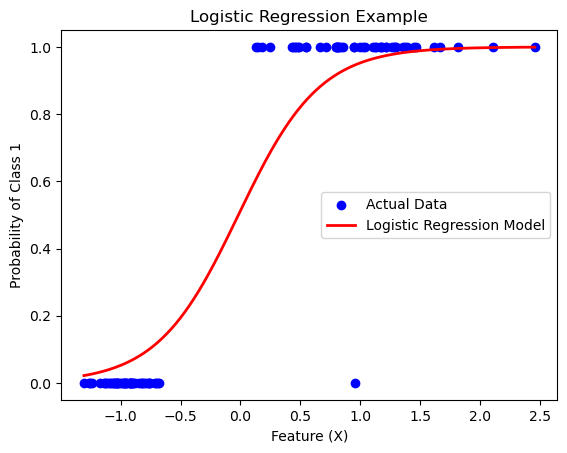

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate synthetic data
X, y = make_classification(n_samples=100, n_features=1, n_informative=1, n_redundant=0, n_clusters_per_class=1, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create a Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")

# Plotting the decision boundary
X_range = np.linspace(X.min(), X.max(), 300)
y_prob = model.predict_proba(X_range.reshape(-1, 1))[:, 1]

plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X_range, y_prob, color='red', linewidth=2, label='Logistic Regression Model')
plt.xlabel('Feature (X)')
plt.ylabel('Probability of Class 1')
plt.title('Logistic Regression Example')
plt.legend()
plt.show()